In [5]:
from youtube_search import YoutubeSearch
import youtube_dl

In [6]:
res = YoutubeSearch("Bad Liar Imagine Dragons", max_results=1).to_dict()
link = "https://www.youtube.com" + res[0]["url_suffix"]

In [7]:
link

'https://www.youtube.com/watch?v=I-QfPUz1es8'

In [13]:
ydl_opts = {
    'format': 'bestaudio/best',
    'postprocessors': [{
        'key': 'FFmpegExtractAudio',
        'preferredcodec': 'mp3',
        'preferredquality': '192',
    }],
    'postprocessor_args': [
        '-ac', '1' # mono channel
    ],
}
with youtube_dl.YoutubeDL(ydl_opts) as ydl:
    ydl.download([link])

[youtube] I-QfPUz1es8: Downloading webpage
[download] Destination: Imagine Dragons - Bad Liar-I-QfPUz1es8.webm
[download] 100% of 4.70MiB in 00:0211MiB/s ETA 00:005
[ffmpeg] Destination: Imagine Dragons - Bad Liar-I-QfPUz1es8.mp3
Deleting original file Imagine Dragons - Bad Liar-I-QfPUz1es8.webm (pass -k to keep)


In [15]:
from pydub import AudioSegment
import matplotlib.pyplot as plt
from scipy.io import wavfile
from tempfile import mktemp

/home/martinoywa/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


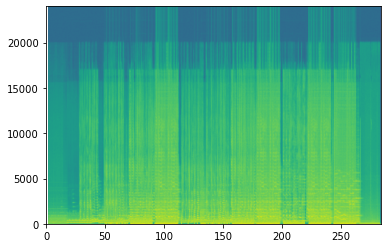

In [17]:
mp3_audio = AudioSegment.from_file('Imagine Dragons - Bad Liar-I-QfPUz1es8.mp3', format="mp3")  # read mp3
wname = mktemp('.wav')  # use temporary file
mp3_audio.export(wname, format="wav")  # convert to wav
FS, data = wavfile.read(wname)  # read wav file
plt.specgram(data, Fs=FS, NFFT=1024, noverlap=0)  # plot
plt.show()

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.specgram.html
    
https://pytorch.org/tutorials/beginner/audio_preprocessing_tutorial.html#spectrogram